In [ ]:
#Esto es un cuaderno, para realizar el proyecto paso a paso

Importamos librerias necesarias en la limpieza de datos (no olvidar instalar las libreras necesarias con pip install .. antes de importarlas)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import folium
import plotly.express as px


Leemos el primer csv, y lo asignamos como nuestro dataframe. Imprimimos las primeras lineas para tener una idea del dataframe

In [7]:
df_ca=pd.read_csv("commercial_activity_df.csv")
print(df_ca.head())

   Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
0           0  1375586   2018-01-28  2018-01-12           KHL   
1           1  1050611   2018-01-28  2015-08-10           KHE   
2           2  1050612   2018-01-28  2015-08-10           KHE   
3           3  1050613   2018-01-28  2015-08-10           KHD   
4           4  1050614   2018-01-28  2015-08-10           KHE   

   active_customer             segment  
0              1.0   02 - PARTICULARES  
1              0.0  03 - UNIVERSITARIO  
2              0.0  03 - UNIVERSITARIO  
3              0.0  03 - UNIVERSITARIO  
4              1.0  03 - UNIVERSITARIO  


Obtenemos informacion general del dataframe con  los metodos .describe() e .info()

In [9]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


Vemos que existe una columna de numeros, que coincide con el numero de los registros, pero que no es el indice, llamada Unnamed. Vamos a cambiar el nombre a esta columna y asignarla como indice.

In [10]:
n_index = 'Index'
df_ca = df_ca.rename_axis(n_index).reset_index()

In [11]:
df_ca.set_index('Index', inplace=True)

Comprobamos que el indice ahora es correcto, pero nos sobra la columna Unnamed, la borramos con del

In [15]:
print(df_ca.head())

        pk_cid pk_partition  entry_date entry_channel  active_customer  \
Index                                                                    
0      1375586   2018-01-28  2018-01-12           KHL              1.0   
1      1050611   2018-01-28  2015-08-10           KHE              0.0   
2      1050612   2018-01-28  2015-08-10           KHE              0.0   
3      1050613   2018-01-28  2015-08-10           KHD              0.0   
4      1050614   2018-01-28  2015-08-10           KHE              1.0   

                  segment  
Index                      
0       02 - PARTICULARES  
1      03 - UNIVERSITARIO  
2      03 - UNIVERSITARIO  
3      03 - UNIVERSITARIO  
4      03 - UNIVERSITARIO  


In [14]:
del(df_ca["Unnamed: 0"])

In [16]:
print(df_ca.head())

        pk_cid pk_partition  entry_date entry_channel  active_customer  \
Index                                                                    
0      1375586   2018-01-28  2018-01-12           KHL              1.0   
1      1050611   2018-01-28  2015-08-10           KHE              0.0   
2      1050612   2018-01-28  2015-08-10           KHE              0.0   
3      1050613   2018-01-28  2015-08-10           KHD              0.0   
4      1050614   2018-01-28  2015-08-10           KHE              1.0   

                  segment  
Index                      
0       02 - PARTICULARES  
1      03 - UNIVERSITARIO  
2      03 - UNIVERSITARIO  
3      03 - UNIVERSITARIO  
4      03 - UNIVERSITARIO  


Tambien cambiaremos las columnas "pk_partition" y "entry_date" a formato fecha

In [43]:
for i in ["pk_partition","entry_date"]:
    df_ca[i]=pd.to_datetime(df_ca[i],format='%Y-%m-%d')


In [45]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 318.5+ MB


Comenzamos ahora la busqueda de nulos


In [17]:
df_ca.isnull().any()

pk_cid             False
pk_partition       False
entry_date         False
entry_channel       True
active_customer    False
segment             True
dtype: bool

Existen dos columnas con nulos, vamos a ver cuantos son

In [19]:
df_ca.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      133033
active_customer         0
segment            133944
dtype: int64

Ahora contaremos los posibles duplicados que haya, si los hay

In [46]:
df_ca[df_ca.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pk_cid           0 non-null      int64         
 1   pk_partition     0 non-null      datetime64[ns]
 2   entry_date       0 non-null      datetime64[ns]
 3   entry_channel    0 non-null      object        
 4   active_customer  0 non-null      float64       
 5   segment          0 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 0.0+ bytes


Ahora echaremos un vistazo al dataframe con un histrograma

array([[<Axes: title={'center': 'pk_cid'}>,
        <Axes: title={'center': 'pk_partition'}>],
       [<Axes: title={'center': 'entry_date'}>,
        <Axes: title={'center': 'active_customer'}>]], dtype=object)

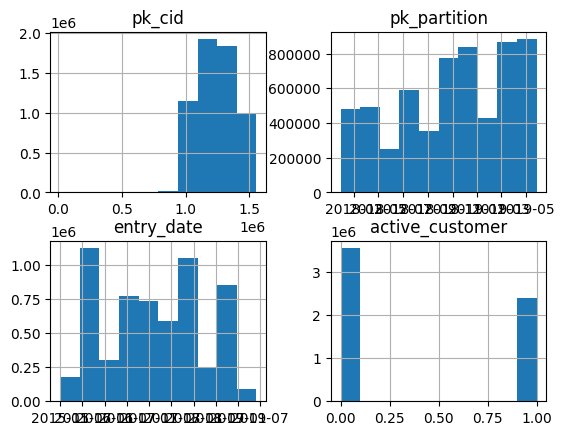

In [47]:
df_ca.hist()

In [51]:
df_ca["entry_channel"].value_counts()

entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: count, Length: 68, dtype: int64